In [1]:
#!/usr/bin/env/python -W ignore::DeprecationWarning
import pandas as pd
import numpy as np

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#The classifiers
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

# Model selection
from sklearn.model_selection import  GridSearchCV, train_test_split

# For scoring
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('data/customer_churn_balanced.csv')

In [6]:
data.head()

,Tenure,Gender,Geography,salary_quantiles,balance_quantiles,age_quantiles,CreditScore,NumOfProducts,HasCrCard,Exited
0,0,Male,France,second,seventh,third,651,2,0,1
1,7,Female,France,fourth,third,second,674,1,1,0
2,7,Male,France,first,first,fifth,617,2,0,0
3,8,Female,France,first,sixth,fourth,843,1,1,0
4,7,Female,France,sixth,seventh,fourth,850,1,1,0


In [7]:
# I prefer working with all lower-case columns
data.columns = ['tenure','gender','geography','salary_quantiles', 'balance_quantiles','age_quantiles','credit_score', 'num_products', 'has_card', 'exited']

In [8]:
X = data.ix[:,0:8]

In [9]:
y = data.ix[:,8]

In [10]:
# Before we model, let's look at feature selection again.

# Intitiate our label encoder for the categorical variables

labelencoder_X1 = LabelEncoder()
X.ix[:, 1] = labelencoder_X1.fit_transform(X.ix[:, 1])

In [11]:
labelencoder_X2 = LabelEncoder()
X.ix[:, 2] = labelencoder_X2.fit_transform(X.ix[:, 2])

In [12]:
labelencoder_X3 = LabelEncoder()
X.ix[:, 3] = labelencoder_X3.fit_transform(X.ix[:, 3])

In [13]:
labelencoder_X4 = LabelEncoder()
X.ix[:, 4] = labelencoder_X4.fit_transform(X.ix[:, 4])

In [14]:
labelencoder_X5 = LabelEncoder()
X.ix[:, 5] = labelencoder_X5.fit_transform(X.ix[:, 5])

In [15]:
params = {
    'n_estimators': 10000,
    'criterion': 'gini',#default
    'random_state':0,
    'n_jobs':-1
}

clf = RandomForestClassifier(**params)

clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
names =['tenure','gender','geography','salary_quantiles', 'balance_quantiles','age_quantiles','credit_score', 'num_products', 'has_card']

In [17]:
feature_importances = (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names),
                          reverse=True))

In [18]:
importances = [x[0] for x in feature_importances]
features = [x[1] for x in feature_importances]

Text(0.5, 1.0, 'Feature Importance')

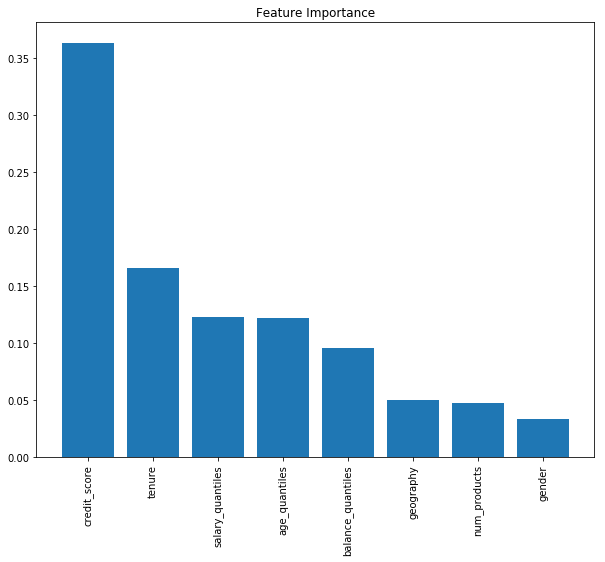

In [19]:
fig = plt.figure(figsize=(10,8))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
params = {
    'n_estimators': [500, 600, 700, 800, 900, 1000, 1250, 1500],
    'random_state':[2],
    'learning_rate':[.10,.15,.20,.25,.5,1,1.5,2,4,8,10]

}

clf = AdaBoostClassifier()

search = GridSearchCV(clf, params,'roc_auc', n_jobs=-1)

In [40]:
search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 600, 700, 800, 900, 1000, 1250, 1500], 'random_state': [2], 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.5, 1, 1.5, 2, 4, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [41]:
search.best_params_

{'learning_rate': 0.5, 'n_estimators': 1250, 'random_state': 2}

In [42]:
# Boosting
params = {
    'n_estimators': 1250,
    'learning_rate':.5
}

clf = AdaBoostClassifier(**params)

clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=1250, random_state=None)

In [43]:
clf.score(x_test, y_test)

0.7191460973982655

In [44]:
roc_auc_score(y_train, clf.decision_function(x_train))

0.6005167165375735

In [45]:
params = {
    'n_estimators': [5,10,50,100,500,1000,5000,10000,20000],
    'random_state':[2],
    'learning_rate':[.01,.02,.05,.10,.25,.5,1],
    'max_depth':[1,2,3,4,5,6]
    
}

clf = GradientBoostingClassifier()

search = GridSearchCV(clf, params, n_jobs=-1)

In [46]:
search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 50, 100, 500, 1000, 5000, 10000, 20000], 'random_state': [2], 'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 1], 'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5, 'random_state': 2}

In [48]:
params = {
    'n_estimators': 5,
    'random_state':2,
    'learning_rate':.1,
    'max_depth':6
    
}

clf = GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              n_iter_no_change=None, presort='auto', random_state=2,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [49]:
clf.score(x_test, y_test)

0.7204803202134756

In [50]:
roc_auc_score(y_train, clf.decision_function(x_train))

0.6618352573032056

In [53]:
params = {
    'n_estimators': [5000,10000, 15000,20000,25000],
    #'criterion': ['gini'],#default
    'random_state':[0]
    
}

clf = RandomForestClassifier()

search = GridSearchCV(clf, params, n_jobs=2)

In [54]:
search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_estimators': [5000, 10000, 15000, 20000, 25000], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
search.best_params_

{'n_estimators': 10000, 'random_state': 0}

In [56]:
params = {
    'n_estimators': 10000,
    'criterion': 'gini',#default
    'random_state':0
}

clf = RandomForestClassifier(**params)

clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
clf.score(x_test, y_test)

0.9993328885923949

In [58]:
 y_predicted =clf.predict_proba(x_test)[:, 1]

In [59]:
roc_auc_score(y_test, y_predicted)

1.0

## RandomForest shows nearly perfectly accuracy? More testing is needed as this is surely an over-fit. I think I would try limiting leaves at this point. 
## AdaBoost comes in around 66-71% while GradientBoosting comes in at 66-72%.
## It looks like we might be on the way to some pretty good models, with the RandomForest seeming to be be best for this data.

## While we don't have models to write home about yet -- just run ann.py and stay tuned for the modeling on numeric data, removing the quantile bins -- hopefully this shows the steps I follow to compare and select models. 

## I will come back to this in the future and try to improve these models, and test some more algorithms.
